![Python Logo](./logo_IESEG/logoIESEG_allonge.png)

# Group Project Financial Data Set
## Financial Programming - IÉSEG, Lille - MBD 2022-2023
### By Arias Toribio Brigth & Chauvin Salome & Kancel Cyril

This python project analyze the operation data set of PKDD'99 clients during 1996 in order to predict actions of the bank to 1997 year  and give insights to improve its services.

The next lines of code as priority prepare each of the data sets, create new variables and make a final data set of each client with its respective variables to finally display visualizations.



### Import packages

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import squarify
import matplotlib
import matplotlib.pyplot as plt

### Read the data bases

In [2]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('C:\\Users\\bariastoribio\\OneDrive - IESEG\\IESEG 1_SEMESTER\\Financial Programming_Python\\Group project\\FP_GroupProject_Group_Arias_Chavin_Kancel\\data\\raw\\data_berka\\loan.asc', sep=';')

# A. Data Preparation

## Account table 1

#### Select only account that openned before 1996

In [3]:
# Creation of the column year
account['opening_year'] = '19' + account['date'].astype(str).str[:2]
account['opening_year'] = account['opening_year'].astype(int)

# Selection of account created before 1996
account_96 = account[account['opening_year'] < 1996].copy(deep = True)

#Rename frequency of issuance
account_96["frequency"].replace({"POPLATEK MESICNE": "monthly", 
                                 "POPLATEK TYDNE": "weekly",
                                 "POPLATEK PO OBRATU": "after_transaction"}, inplace=True)

account_96.head()

,account_id,district_id,frequency,date,opening_year
0,576,55,monthly,930101,1993
1,3818,74,monthly,930101,1993
2,704,55,monthly,930101,1993
3,2378,16,monthly,930101,1993
4,2632,24,monthly,930102,1993


## Transaction table 2

In [4]:
# Verify if there is any outliers in the k_symbol column

trans['k_symbol'].unique()

# We can see a k_symbol equals to ' ' so we replace it by 0

trans.loc[trans['k_symbol'] == ' ', 'k_symbol'] = 'Non Specified'

In [5]:
# Check the type of transactions
trans['type'].unique()
    # 'PRIJEM' for credit
    # 'VYDAJ' and 'VYBER' for withdrawal

# There isn't any outliers

array(['PRIJEM', 'VYDAJ', 'VYBER'], dtype=object)

#### Select only transaction that were made before 1996

In [6]:
# Select only transactions in 1996
trans96 = trans[trans['date'].astype(str).str[:2] == '96'].copy(deep = True)

# Fill the missing values with 0
trans96.fillna(0)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
252855,732811,2504,960101,VYDAJ,VYBER KARTOU,900.0,38124.4,0,0,0.0
252856,800209,2729,960101,VYDAJ,VYBER,1920.0,34202.7,0,0,0.0
252857,803553,2738,960101,VYDAJ,VYBER,6500.0,25685.2,0,0,0.0
252858,1042686,3566,960101,VYDAJ,VYBER,1000.0,25919.7,0,0,0.0
252859,1042689,3566,960101,VYDAJ,VYBER,500.0,25419.7,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
449629,515914,1763,961231,VYDAJ,VYBER,14.6,67769.5,SLUZBY,0,0.0
449630,516262,1765,961231,VYDAJ,VYBER,14.6,19708.1,SLUZBY,0,0.0
449631,520019,1775,961231,VYDAJ,VYBER,14.6,15944.5,SLUZBY,0,0.0
449632,517894,1769,961231,VYDAJ,VYBER,14.6,34679.4,SLUZBY,0,0.0


In [7]:
# Add a column with only the month of transaction for further calculations

trans96['trans_month'] = trans96['date'].astype(str).str[2:4].astype(int)

In [8]:
trans96.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_month
252855,732811,2504,960101,VYDAJ,VYBER KARTOU,900.0,38124.4,NaN,NaN,0.0,1
252856,800209,2729,960101,VYDAJ,VYBER,1920.0,34202.7,NaN,NaN,NaN,1
252857,803553,2738,960101,VYDAJ,VYBER,6500.0,25685.2,NaN,NaN,NaN,1
252858,1042686,3566,960101,VYDAJ,VYBER,1000.0,25919.7,NaN,NaN,NaN,1
252859,1042689,3566,960101,VYDAJ,VYBER,500.0,25419.7,NaN,NaN,NaN,1


## Card table 3

In [9]:
# Check if there is any missing values

card.info() # There isn't
card.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


#### Select only the card that were issued during 1996

In [10]:
# Select only the information about the year 1996
card96 = card[card['issued'].astype(str).str[:2].isin(['96'])].copy(deep = True)

# Erase the 00:00:00 part of the issue date
card96['issued'] = card96['issued'].astype(str).str[:6]

# Change the data type of the issued date:
card96['issued'] = pd.to_datetime(card96['issued'], format = '%y%m%d')
card96.head()

,card_id,disp_id,type,issued
85,337,2141,classic,1996-01-01
86,771,5233,classic,1996-01-08
87,379,2431,classic,1996-01-12
88,106,592,classic,1996-01-14
89,606,3883,classic,1996-01-22


## Loan table 4

In [11]:
# We create three more columns with the year, month and day of when the loan was granted
loan['loan_year'] = '19' + loan['date'].astype(str).str[:2]
loan['loan_year'] = loan['loan_year'].astype(int)

loan['loan_month'] = loan['date'].astype(str).str[2:4].astype(int)

loan['loan_day'] = loan['date'].astype(str).str[-2:].astype(int)

#### Select only the loan that were granted during the year 1996

In [12]:
# Select only the loan granted in 1996
loan96 = loan[loan['date'].astype(str).str[:2].isin(['96'])].copy(deep=True)

# Change the type of the loan date to a date type
loan96['date'] = pd.to_datetime(loan96['date'], format = '%y%m%d')

loan.head()

,loan_id,account_id,date,amount,duration,payments,status,loan_year,loan_month,loan_day
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5
1,5316,1801,930711,165960,36,4610.0,A,1993,7,11
2,6863,9188,930728,127080,60,2118.0,A,1993,7,28
3,5325,1843,930803,105804,36,2939.0,A,1993,8,3
4,7240,11013,930906,274740,60,4579.0,A,1993,9,6


## District table 5

In [13]:
# Create an empty dataset

district96 = pd.DataFrame()

In [14]:
# Add the variable to it

district96['district_id'] = district['A1']
district96['district_name'] = district['A2']
district96['region'] = district['A3']
district96['Nbr_of_inhabitants'] = district['A4']
district96['urban_inhabitants_ratio'] = district['A10']
district96['Avg_Salary'] = district['A11']
district96['unemployment_rate_1996'] = district['A13']
district96['Nbr_of_entrepreneurs_per_1000_inhabitants'] = district['A14']
district96['Nbr_of_crimes_1996'] = district['A16']

In [15]:
# Normalize large variables Avg_Salary and Nb_Inhabitants
district96['Nbr_of_inhabitants'] = (district96['Nbr_of_inhabitants'] - district96['Nbr_of_inhabitants'].min()) / (district96['Nbr_of_inhabitants'].max() - district96['Nbr_of_inhabitants'].min())
district96['Avg_Salary']= (district96['Avg_Salary'] - district96['Avg_Salary'].min()) / (district96['Avg_Salary'].max() - district96['Avg_Salary'].min())

In [16]:
district96.head()

,district_id,district_name,region,Nbr_of_inhabitants,urban_inhabitants_ratio,Avg_Salary,unemployment_rate_1996,Nbr_of_entrepreneurs_per_1000_inhabitants,Nbr_of_crimes_1996
0,1,Hl.m. Praha,Prague,1.000000,100.0,1.000000,0.43,167,99107
1,2,Benesov,central Bohemia,0.039637,46.7,0.089596,1.85,132,2674
2,3,Beroun,central Bohemia,0.027889,41.7,0.196344,2.21,111,2813
3,4,Kladno,central Bohemia,0.092134,67.4,0.370797,5.05,109,5892
4,5,Kolin,central Bohemia,0.045429,51.4,0.270142,4.43,118,3040


# B. Creation of Independient Variables

## Account table 1 and Client table 2

#### Lenght of Relationship

In [17]:
# Add length of relationship in year
account_96['lor'] = 1996 - account_96['opening_year']

#### Add some information from the client table to the account table and select only the owners

In [18]:
# Add information about account owner
df_to_96 = pd.merge(account_96, disp[disp['type'] == 'OWNER'], how='left', on='account_id')
df_to_96 = pd.merge(client, df_to_96, how='right', on='client_id')
df_to_96 = df_to_96.rename(columns={'district_id_x':'bank_district_id',
                        'district_id_y':'client_district_id'})
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,type
0,692,365111,74,576,55,monthly,930101,1993,3,692,OWNER
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,OWNER
2,844,450114,22,704,55,monthly,930101,1993,3,844,OWNER
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,OWNER
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,OWNER


#### Add information on the account table with owners and disponent to calculate the number of users per account

In [19]:
# Merge the tables account and disp to later add information about the number of clients per account
df = pd.merge(account_96, disp, how='left', on='account_id')
df = pd.merge(df, client, how='left', on='client_id')
df = df.rename(columns={'district_id_x':'bank_district_id',
                        'district_id_y':'client_district_id'})
df.head()

,account_id,bank_district_id,frequency,date,opening_year,lor,disp_id,client_id,type,birth_number,client_district_id
0,576,55,monthly,930101,1993,3,692,692,OWNER,365111,74
1,576,55,monthly,930101,1993,3,693,693,DISPONENT,350317,74
2,3818,74,monthly,930101,1993,3,4601,4601,OWNER,350402,1
3,3818,74,monthly,930101,1993,3,4602,4602,DISPONENT,345404,1
4,704,55,monthly,930101,1993,3,844,844,OWNER,450114,22


In [20]:
# Creation of the column number of users per account

account_agg_users = df.groupby(['account_id'])['type'].agg('count')
account_agg_users = account_agg_users.reset_index()
account_agg_users = account_agg_users.rename(columns={'type':'nbr_users'})
account_agg_users.head()

,account_id,nbr_users
0,1,1
1,2,2
2,6,1
3,8,2
4,9,1


In [21]:
# Add information about number of users per account on the final table
# Join with previous table
df_to_96 = pd.merge(df_to_96, account_agg_users, how='left', on='account_id')
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,type,nbr_users
0,692,365111,74,576,55,monthly,930101,1993,3,692,OWNER,2
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,OWNER,2
2,844,450114,22,704,55,monthly,930101,1993,3,844,OWNER,2
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,OWNER,1
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,OWNER,1


#### Add information about the client (birth_number)

In [22]:
# Transform the birth day into year
df_to_96['birth_year'] = '19' + df_to_96['birth_number'].astype(str).str[:2]
df_to_96['birth_year'] = df_to_96['birth_year'].astype(int)

# Transform the birth day to day
df_to_96['birth_day'] = df_to_96['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
df_to_96['birth_month'] = df_to_96['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
df_to_96['gender'] = 'M'
df_to_96['gender'] = 'M'
df_to_96.loc[df_to_96['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
df_to_96.loc[df_to_96['birth_month'] > 50, 'birth_month'] = df_to_96.loc[df_to_96['birth_month'] > 50, 'birth_month'] - 50
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,type,nbr_users,birth_year,birth_day,birth_month,gender
0,692,365111,74,576,55,monthly,930101,1993,3,692,OWNER,2,1936,11,1,F
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,OWNER,2,1935,2,4,M
2,844,450114,22,704,55,monthly,930101,1993,3,844,OWNER,2,1945,14,1,M
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,OWNER,1,1975,24,3,F
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,OWNER,1,1938,12,8,M


#### Add information about client age and age group.

In [23]:
# Age
df_to_96['age'] = 1996 - df_to_96['birth_year']

# Age group
df_to_96['age_group'] = df_to_96['age'] // 10 * 10
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,type,nbr_users,birth_year,birth_day,birth_month,gender,age,age_group
0,692,365111,74,576,55,monthly,930101,1993,3,692,OWNER,2,1936,11,1,F,60,60
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,OWNER,2,1935,2,4,M,61,60
2,844,450114,22,704,55,monthly,930101,1993,3,844,OWNER,2,1945,14,1,M,51,50
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,OWNER,1,1975,24,3,F,21,20
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,OWNER,1,1938,12,8,M,58,50


## Transaction table 3

#### Add information about the total amount of credit per account_id

In [24]:
# Aggregate the total credit per account
trans_agg_credit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum')
trans_agg_credit = trans_agg_credit.reset_index()
trans_agg_credit = trans_agg_credit.rename(columns={'amount':'total_credit'})
trans_agg_credit.head()

,account_id,total_credit
0,1,50066.0
1,2,288542.9
2,4,56920.5
3,6,81507.7
4,7,34905.4


#### Add information about the total amount of withdrawal per account_id

In [25]:
# Aggregate the total withdrawal per account
trans_agg_withdrawal = trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')['amount'].agg('sum')
trans_agg_withdrawal = trans_agg_withdrawal.reset_index()
trans_agg_withdrawal = trans_agg_withdrawal.rename(columns={'amount':'total_withdrawal'})
trans_agg_withdrawal.head()

,account_id,total_withdrawal
0,1,55579.2
1,2,274574.2
2,4,31977.6
3,6,81803.2
4,7,6600.0


#### Add information about the total number of transactions per account_id

In [26]:
# Aggregate the total number of transactions per account
trans_agg_nbr = trans96.groupby('account_id')['trans_id'].agg('count')
trans_agg_nbr = trans_agg_nbr.reset_index()
trans_agg_nbr = trans_agg_nbr.rename(columns={'trans_id':'total_nbr_of_transactions'})
trans_agg_nbr.head()

,account_id,total_nbr_of_transactions
0,1,74
1,2,85
2,4,39
3,6,63
4,7,4


#### Add information about the total number of credit transactions per account_id

In [27]:
# Aggregate the number of credit transactions per account
trans_agg_nbrcredit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')['trans_id'].agg('count')
trans_agg_nbrcredit = trans_agg_nbrcredit.reset_index()
trans_agg_nbrcredit = trans_agg_nbrcredit.rename(columns={'trans_id':'nbr_credit_transactions'})
trans_agg_nbrcredit.head()

,account_id,nbr_credit_transactions
0,1,29
1,2,29
2,4,17
3,6,24
4,7,3


#### Add information about the total number of withdrawal transactions per account_id

In [28]:
# Aggregate the number of withdrawal transactions per account
trans_agg_nbrwithdrawal = trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')['trans_id'].agg('count')
trans_agg_nbrwithdrawal = trans_agg_nbrwithdrawal.reset_index()
trans_agg_nbrwithdrawal = trans_agg_nbrwithdrawal.rename(columns={'trans_id':'nbr_withdrawal_transactions'})
trans_agg_nbrwithdrawal.head()

,account_id,nbr_withdrawal_transactions
0,1,45
1,2,56
2,4,22
3,6,39
4,7,1


#### Add information about the date of the last transaction

In [29]:
# Change the type of the trans date to a date type
trans96['date'] = pd.to_datetime(trans96['date'], format = '%y%m%d')

# Aggregate the date of the last transaction per account
trans_agg_last_trans = trans96.groupby('account_id')['date'].agg(['min', 'max'])
trans_agg_last_trans = trans_agg_last_trans.reset_index()
trans_agg_last_trans = trans_agg_last_trans.rename(columns={'min':'date_first_transaction', 'max':'date_last_transaction'})
trans_agg_last_trans.head()

,account_id,date_first_transaction,date_last_transaction
0,1,1996-01-04,1996-12-31
1,2,1996-01-02,1996-12-31
2,4,1996-02-21,1996-12-31
3,6,1996-01-08,1996-12-31
4,7,1996-11-24,1996-12-31


#### Add information about the lor during 1996 since their first transaction (in days and in month)

In [30]:
# Calculate the LOR relationship during the 1996 year (between the first and last transaction of that year) (21/11/2022)
trans_agg_last_trans['lor_96_in_days'] = trans_agg_last_trans['date_last_transaction'] - trans_agg_last_trans['date_first_transaction']
trans_agg_last_trans['lor_96_in_days'] = trans_agg_last_trans['lor_96_in_days'].dt.days # Convert it into integer
trans_agg_last_trans['lor_96_in_months'] = trans_agg_last_trans['lor_96_in_days']//30
trans_agg_last_trans.head()

,account_id,date_first_transaction,date_last_transaction,lor_96_in_days,lor_96_in_months
0,1,1996-01-04,1996-12-31,362,12
1,2,1996-01-02,1996-12-31,364,12
2,4,1996-02-21,1996-12-31,314,10
3,6,1996-01-08,1996-12-31,358,11
4,7,1996-11-24,1996-12-31,37,1


#### Add information about the number of days since their last transaction

In [31]:
# Calculate the number of days since the last transaction
trans_agg_last_trans['days_since_last_trans'] = pd.to_datetime('1996-12-31',format = '%Y-%m-%d') - trans_agg_last_trans['date_last_transaction']
trans_agg_last_trans['days_since_last_trans'] = trans_agg_last_trans['days_since_last_trans'].dt.days # Convert it into integer (21/11/2022)
trans_agg_last_trans.head()

,account_id,date_first_transaction,date_last_transaction,lor_96_in_days,lor_96_in_months,days_since_last_trans
0,1,1996-01-04,1996-12-31,362,12,0
1,2,1996-01-02,1996-12-31,364,12,0
2,4,1996-02-21,1996-12-31,314,10,0
3,6,1996-01-08,1996-12-31,358,11,0
4,7,1996-11-24,1996-12-31,37,1,0


#### Add information about their final balance at the end of 1996

In [32]:
# What is the final balance of the client after its last transaction? 
trans_final_balance = trans96.groupby('account_id').agg({'date' : 'max', 'trans_id' : 'max'}).reset_index()
b = trans96[['account_id', 'trans_id', 'date', 'balance']]
trans_final_balance = pd.merge(trans_final_balance, b, how = 'left', on = ['account_id', 'trans_id'])
trans_final_balance = trans_final_balance.rename(columns={'balance':'final_balance'})
trans_final_balance = trans_final_balance[['account_id', 'final_balance']]
trans_final_balance.head()

,account_id,final_balance
0,1,12674.5
1,2,53405.5
2,4,24957.6
3,6,33523.8
4,7,28305.4


#### Add information about their balance at the beginning of 1996

In [33]:
# What were their balance at the beginning of the year (after their first transaction ?)
trans_first_balance = trans96.groupby('account_id').agg({'date' : 'min', 'trans_id' : 'min'}).reset_index()
c = trans96[['account_id', 'trans_id', 'date', 'balance']]
trans_first_balance = pd.merge(trans_first_balance, c, how = 'left', on = ['account_id', 'trans_id'])
trans_first_balance = trans_first_balance.rename(columns={'balance':'first_balance'})
trans_first_balance = trans_first_balance[['account_id', 'first_balance']]
trans_first_balance.head()

,account_id,first_balance
0,1,17870.0
1,2,36992.1
2,4,800.0
3,6,39833.7
4,7,900.0


#### Add infortmation about the number of transactions they made with another bank

In [34]:
# Aggregate the number of transactions made with another bank

trans_with_other_bank = trans96[trans96['operation'].isin(['PREVOD Z UCTU', 'PREVOD NA UCET'])].groupby('account_id')['amount'].agg(['count', 'sum']).reset_index()
trans_with_other_bank = trans_with_other_bank.rename(columns={'count':'nbr_trans_other_bank', 'sum':'total_trans_with_other_bank'})
trans_with_other_bank.head()

,account_id,nbr_trans_other_bank,total_trans_with_other_bank
0,1,24,73572.0
1,2,24,350260.0
2,4,21,73630.0
3,6,24,127476.0
4,8,21,95852.0


#### Create a column with the amount of credit

In [35]:
# Add a column with only the amount of credit transactions

trans96['amount_credit'] = 0
trans96['amount_credit'] = trans96.loc[trans96['type'].isin(['PRIJEM']), 'amount']
trans96['amount_credit'] = trans96['amount_credit'].fillna(0)
trans96[trans96['type'].isin(['PRIJEM'])].head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_month,amount_credit
252863,2353940,7765,1996-01-01,PRIJEM,VKLAD,40117.0,81482.5,NaN,NaN,NaN,1,40117.0
252866,921702,3141,1996-01-01,PRIJEM,VKLAD,4900.0,40093.5,NaN,NaN,NaN,1,4900.0
252881,41240,135,1996-01-01,PRIJEM,VKLAD,1300.0,43240.9,NaN,NaN,NaN,1,1300.0
252882,895208,3051,1996-01-01,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,1,800.0
252908,1060236,3624,1996-01-01,PRIJEM,VKLAD,35615.0,51193.5,NaN,NaN,NaN,1,35615.0


#### Create a column with the amount of withdrawal

In [36]:
# Add a column with only the amount of withdrawal transactions

trans96['amount_withdrawal'] = 0
trans96['amount_withdrawal'] = trans96.loc[trans96['type'].isin(['VYDAJ', 'VYBER']), 'amount']
trans96['amount_withdrawal'] = trans96['amount_withdrawal'].fillna(0)
trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_month,amount_credit,amount_withdrawal
252855,732811,2504,1996-01-01,VYDAJ,VYBER KARTOU,900.0,38124.4,NaN,NaN,0.0,1,0.0,900.0
252856,800209,2729,1996-01-01,VYDAJ,VYBER,1920.0,34202.7,NaN,NaN,NaN,1,0.0,1920.0
252857,803553,2738,1996-01-01,VYDAJ,VYBER,6500.0,25685.2,NaN,NaN,NaN,1,0.0,6500.0
252858,1042686,3566,1996-01-01,VYDAJ,VYBER,1000.0,25919.7,NaN,NaN,NaN,1,0.0,1000.0
252859,1042689,3566,1996-01-01,VYDAJ,VYBER,500.0,25419.7,NaN,NaN,NaN,1,0.0,500.0


#### Show the amount of credit per month for each account_id

In [37]:
# Sum of monthly credit transaction

sum_credit_trans_month = trans96.pivot_table(index="account_id", columns=["trans_month"],values="amount_credit", aggfunc = np.sum).copy(deep = True).reset_index()

# Replace the missing values by 0

sum_credit_trans_month = sum_credit_trans_month.fillna(0)
sum_credit_trans_month.head()

trans_month,account_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1,3743.1,3838.7,3944.7,3746.6,3742.3,5144.5,4751.8,6154.7,3757.8,3752.2,3751.4,3738.2
1,2,20536.1,26171.4,20422.3,20403.1,27061.8,38018.9,20436.1,20404.0,20396.4,23707.4,20427.9,30557.5
2,4,0.0,800.0,5553.0,5553.0,5553.0,5553.0,5619.6,5658.3,5651.9,5653.6,5663.0,5662.1
3,6,6798.4,6778.8,6782.1,6788.7,6797.5,6777.9,6772.6,6784.3,6795.9,6806.2,6812.4,6812.9
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,34005.4


In [38]:
# Rename the month columns to prepare for the merge

sum_credit_trans_month = sum_credit_trans_month.rename(columns={1:"credit_jan96", 
                                2:"credit_feb96",
                                3:"credit_mar96",
                                4:"credit_apr96",
                                5:"credit_may96",
                                6:"credit_jun96",
                                7:"credit_jul96",
                                8:"credit_aug96",
                                9:"credit_sep96",
                                10:"credit_oct96",
                                11:"credit_nov96",
                                12:"credit_dec96",})

#### Show the amount of withdrawal per month for each account_id

In [39]:
# Sum of monthly withdrawal transaction

sum_withdrawal_trans_month = trans96.pivot_table(index="account_id", columns=["trans_month"],values="amount_withdrawal", aggfunc = np.sum).copy(deep = True).reset_index()

# Replace the missing values by 0

sum_withdrawal_trans_month = sum_withdrawal_trans_month.fillna(0)
sum_withdrawal_trans_month.head()

trans_month,account_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1,8336.6,2466.6,2466.6,4466.6,5026.6,2826.6,3456.6,5016.6,4166.6,5736.6,5266.6,6346.6
1,2,37180.6,10780.6,19880.6,36225.6,25757.6,10180.6,37324.6,10780.6,32521.6,10780.6,16480.6,26680.6
2,4,0.0,0.0,0.0,0.0,0.0,0.0,3199.6,7477.6,6677.6,3377.6,3377.6,7867.6
3,6,14538.6,7248.6,4528.6,5488.6,3968.6,15568.6,3968.6,3968.6,3968.6,5648.6,3968.6,8938.6
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6600.0


In [40]:
# Rename the months column to prepare for the merge

sum_withdrawal_trans_month = sum_withdrawal_trans_month.rename(columns={1: "withdrawal_jan96", 
                                2: "withdrawal_feb96",
                                3: "withdrawal_mar96",
                                4: "withdrawal_apr96",
                                5: "withdrawal_may96",
                                6: "withdrawal_jun96",
                                7: "withdrawal_jul96",
                                8: "withdrawal_aug96",
                                9: "withdrawal_sep96",
                                10: "withdrawal_oct96",
                                11: "withdrawal_nov96",
                                12: "withdrawal_dec96"})

#### Show the number of transactions per month for each account_id

In [41]:
# Number of monthly credit transaction

nbr_of_trans_per_month = trans96.pivot_table(index="account_id", columns=["trans_month"],values="amount", aggfunc = 'count').copy(deep=True).reset_index()

# Replace the missing values by 0

nbr_of_trans_per_month = nbr_of_trans_per_month.fillna(0)
nbr_of_trans_per_month.head()

trans_month,account_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1,12.0,5.0,5.0,5.0,6.0,6.0,6.0,7.0,5.0,6.0,5.0,6.0
1,2,10.0,6.0,6.0,7.0,8.0,6.0,8.0,6.0,7.0,6.0,7.0,8.0
2,4,0.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,6.0,5.0,5.0,7.0
3,6,12.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,6.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [42]:
# Rename the months column to prepare for the merge

nbr_of_trans_per_month = nbr_of_trans_per_month.rename(columns={1: "num_trans_jan96", 
                                2: "num_trans_feb96",
                                3: "num_trans_mar96",
                                4: "num_trans_apr96",
                                5: "num_trans_may96",
                                6: "num_trans_jun96",
                                7: "num_trans_jul96",
                                8: "num_trans_aug96",
                                9: "num_trans_sep96",
                                10: "num_trans_oct96",
                                11: "num_trans_nov96",
                                12: "num_trans_dec96"})

#### Add the amount of transactions in cash

In [43]:
# Aggregate the number and amount of transactions made in cash

trans_in_cash = trans96[trans96['operation'].isin(['VKLAD', 'VYBER'])].groupby('account_id')['amount'].agg(['count', 'sum']).reset_index()
trans_in_cash = trans_in_cash.rename(columns={'count':'nbr_trans_in_cash', 'sum':'total_trans_in_cash'})
trans_in_cash.head()

,account_id,nbr_trans_in_cash,total_trans_in_cash
0,1,38,31255.2
1,2,49,210882.2
2,4,12,14677.6
3,6,27,34355.2
4,7,3,41475.0


#### Add the amount of credit card withdrawal transactions

In [44]:
# Aggregate the number and amount of credit card withdrawal transactions

trans_credit_card_withdrawal = trans96[trans96['operation'].isin(['VYBER KARTOU'])].groupby('account_id')['amount'].agg(['count', 'sum']).reset_index()
trans_credit_card_withdrawal = trans_credit_card_withdrawal.rename(columns={'count':'nbr_credit_card_withdrawal', 'sum':'total_card_withdrawal'})
trans_credit_card_withdrawal.head()

,account_id,nbr_credit_card_withdrawal,total_card_withdrawal
0,33,7,14100.0
1,43,13,27100.0
2,71,1,3500.0
3,73,10,24300.0
4,95,3,8100.0


### Add information about the RFM score

In [45]:
# Aggregate the latest date of transaction, the count of transactions and the total amount of
# of credit card withdrawal transactions, credit in cash transactions
# and collection from another bank transactions.
    # Transactions that benefit to the bank

trans_for_rfm = trans96[trans96['operation'].isin(['VYBER KARTOU', 'VKLAD', 'PREVOD Z UCTU'])].groupby('account_id').agg({'date':'max', 'trans_id':'count', 'amount':'sum'})
trans_for_rfm = trans_for_rfm.rename(columns={'date':'latest_date',
                                             'trans_id':'transactions_count',
                                             'amount':'total_amount'})
trans_for_rfm.head()

,latest_date,transactions_count,total_amount
account_id,,,
1,1996-12-13,17,49248.0
2,1996-12-12,17,286568.0
4,1996-12-11,11,56330.0
6,1996-12-11,12,80028.0
7,1996-12-07,2,34875.0


In [46]:
# We calculate and assign RFM values to each client
    # We calculate the percentiles to figure out what are the clients' value

percentiles = trans_for_rfm.rank(pct=True, method='dense')
percentiles.head()

,latest_date,transactions_count,total_amount
account_id,,,
1,0.831776,0.425,0.206576
2,0.822430,0.425,0.820483
4,0.813084,0.275,0.253419
6,0.813084,0.300,0.393657
7,0.775701,0.050,0.115217


In [47]:
# Function that interpret percentiles as RFM values
    # By creating 5 groups

def get_rfm_value(percentile_value):
    """Returns value 1-5 based on the percentile given"""
    if percentile_value <= 0.2:
        return 1
    elif percentile_value <= 0.4:
        return 2
    elif percentile_value <= 0.6:
        return 3
    elif percentile_value <= 0.8:
        return 4
    else:
        return 5
    
rfm_values = percentiles.applymap(get_rfm_value)
rfm_values.columns = ['R', 'F', 'M']



rfm_values.head()

,R,F,M
account_id,,,
1,5,3,2
2,5,3,5
4,5,2,2
6,5,2,2
7,4,1,1


In [48]:
# Apply the Weighted Aggregation Approach to return overall RFM scores
    # We assign a 30% weight for the Recency value (6 because 5*6 = 30)
    # We assign a 20% weight for the Frequency value (4 because 5*4 = 20)
    # We assign a 50% weight for the Monetary value (10 because 5*10 = 50)
# In order to became its original value

def get_weigthed_agg(client):
    """Returns the sum of scaled R, F and M values."""
    new_R = client['R']*6
    new_F = client['F']*4
    new_M = client['M']*10
    return new_R + new_F + new_M

rfm_values['weighted_rfm_scores'] = rfm_values.apply(get_weigthed_agg, axis=1)

rfm_values.head()

,R,F,M,weighted_rfm_scores
account_id,,,,
1,5,3,2,62
2,5,3,5,92
4,5,2,2,58
6,5,2,2,58
7,4,1,1,38


In [49]:
# Select only the account_id and the weighted_rfm_scores for later merge

rfm_values = rfm_values.reset_index()
rfm_values = rfm_values.loc[:,['account_id', 'weighted_rfm_scores']].copy(deep=True)
rfm_values

,account_id,weighted_rfm_scores
0,1,62
1,2,92
2,4,58
3,6,58
4,7,38
...,...,...
3595,11333,86
3596,11349,82
3597,11359,88
3598,11362,72


## Loan table 4

#### Aggregate the total amount granted per account_id

In [50]:
# Aggregate the total amount per account
loan_agg_amount = loan96.groupby(['account_id'])['amount'].agg('sum')
loan_agg_amount = loan_agg_amount.reset_index()
loan_agg_amount = loan_agg_amount.rename(columns={'amount':'total_loan_amount'})
loan_agg_amount.head()

,account_id,total_loan_amount
0,19,30276
1,67,165960
2,132,88440
3,501,262980
4,544,91152


#### Aggregate the total number of loan granted per account_id

In [51]:
# Aggregate the total number of loan per account
loan_agg_quantity = loan96.groupby(['account_id'])['loan_id'].agg('count')
loan_agg_quantity = loan_agg_quantity.reset_index()
loan_agg_quantity = loan_agg_quantity.rename(columns={'loan_id':'total_number_loan'})
loan_agg_quantity.head()

#LG1 = loan_agg_quantity.loc[loan_agg_quantity['total_number_loan'] == 1]
#LG1.head()

,account_id,total_number_loan
0,19,1
1,67,1
2,132,1
3,501,1
4,544,1


#### Aggregate the number of days and months since they did their loan

In [52]:
# Aggregate the date of the last and first loan per account
loan_agg_lastLoan = loan96.groupby('account_id')['date'].agg(['max'])
loan_agg_lastLoan = loan_agg_lastLoan.reset_index()
loan_agg_lastLoan = loan_agg_lastLoan.rename(columns={'max':'date_loan'})
loan_agg_lastLoan.head()

,account_id,date_loan
0,19,1996-04-29
1,67,1996-05-02
2,132,1996-11-06
3,501,1996-10-24
4,544,1996-08-22


In [53]:
#Length of days since its last loan
# Aggregate the lenght of days since its last loan
loan_agg_lastLoan['lenDays_lastLoan_96'] = pd.to_datetime('1996-12-31') - loan_agg_lastLoan['date_loan']
loan_agg_lastLoan['lenDays_lastLoan_96'] = loan_agg_lastLoan['lenDays_lastLoan_96'].dt.days # Convert it into integer

#Aggregate of months since the first loan
loan_agg_lastLoan['lenMonths_SinceLoan'] = loan_agg_lastLoan['lenDays_lastLoan_96']//30
loan_agg_lastLoan.head()

,account_id,date_loan,lenDays_lastLoan_96,lenMonths_SinceLoan
0,19,1996-04-29,246,8
1,67,1996-05-02,243,8
2,132,1996-11-06,55,1
3,501,1996-10-24,68,2
4,544,1996-08-22,131,4


#### Aggregate the amount of the loan they were supposed to refund at the end of 1996

In [54]:
#Aggregate the amount of the payment assuming that they 

#The minimun of duration is 12
min(loan96['duration'])

loan96['lenMonths_SinceLoan'] = pd.to_datetime('1996-12-31') - loan96['date']
loan96['lenMonths_SinceLoan'] = loan96['lenMonths_SinceLoan'].dt.days // 30

#Creation of the amount of payment 

loan96['amount_refunded'] = loan96['lenMonths_SinceLoan'] * loan96['payments']

#Aggregation the amount of the payment in the final of the year per account id
loan_agg_amountPayment = loan96.groupby('account_id')['amount_refunded'].agg('sum')
loan_agg_amountPayment = loan_agg_amountPayment.reset_index()
loan_agg_amountPayment.head()


,account_id,amount_refunded
0,19,20184.0
1,67,55320.0
2,132,7370.0
3,501,8766.0
4,544,15192.0


#### Add information about what is left to pay

In [55]:
# How much rest of payment has
loan96['amount_payment_left'] = loan96['amount'] - loan96['amount_refunded']

# Aggregation of leftPayment in the final of the year per account id
loan_agg_leftPayment = loan96.groupby('account_id')['amount_payment_left'].agg('sum')
loan_agg_leftPayment = loan_agg_leftPayment.reset_index()
loan_agg_leftPayment.head()

,account_id,amount_payment_left
0,19,10092.0
1,67,110640.0
2,132,81070.0
3,501,254214.0
4,544,75960.0


In [56]:
# Show the percentage of what is left to pay
loan96['amount_payment_in%'] = round(loan96['amount_payment_left']/loan96['amount'] * 100,2)

#Each account has just one loan
loan_agg_PercPayment = loan96[['account_id','amount_payment_in%']] 
loan_agg_PercPayment.head()

,account_id,amount_payment_in%
211,7815,50.00
212,4503,75.00
213,4907,75.00
214,5126,77.08
215,2496,81.67


## Card table 5

In [57]:
# Merge with the disposition table to have the account_id

card96 = pd.merge(card96, disp, how = 'left', on = 'disp_id')

# Rename the card type and the client type

card96 = card96.rename(columns={'type_x':'card_type', 'type_y':'client_type'})

card96.head()

,card_id,disp_id,card_type,issued,client_id,account_id,client_type
0,337,2141,classic,1996-01-01,2141,1766,OWNER
1,771,5233,classic,1996-01-08,5233,4343,OWNER
2,379,2431,classic,1996-01-12,2431,2001,OWNER
3,106,592,classic,1996-01-14,592,493,OWNER
4,606,3883,classic,1996-01-22,3883,3210,OWNER


#### Add information about the number of cards issued by account

In [58]:
# Create a variable about the number of cards per account_id

card96_nbr_issued = card96.groupby('account_id')['card_id'].agg('count').reset_index()
card96_nbr_issued = card96_nbr_issued.rename(columns={'card_id':'nbr_card_issued'})
card96_nbr_issued.head()

,account_id,nbr_card_issued
0,66,1
1,71,1
2,95,1
3,128,1
4,196,1


#### Add information about the number of days since the last card issued

In [59]:
# Create a variable of the date of the card issued

days_since_last_issued = card96.groupby('account_id')['issued'].agg('min').reset_index()
days_since_last_issued = days_since_last_issued.rename(columns={'issued':'date_card_issued'})
days_since_last_issued

# Create the number of days since last transaction

days_since_last_issued['days_since_last_issue'] = pd.to_datetime('1996-12-31',format = '%Y-%m-%d') - days_since_last_issued['date_card_issued']

# Erase the 'days' part of the variable

days_since_last_issued['days_since_last_issue'] = days_since_last_issued['days_since_last_issue'].dt.days

# Create the same variable but by month

days_since_last_issued['months_since_last_issue'] = days_since_last_issued['days_since_last_issue'] // 30
days_since_last_issued.head()

,account_id,date_card_issued,days_since_last_issue,months_since_last_issue
0,66,1996-12-07,24,0
1,71,1996-09-11,111,3
2,95,1996-02-17,318,10
3,128,1996-08-05,148,4
4,196,1996-04-20,255,8


## District table 6

In [60]:
#Adding the criminality rate per 1000 inhabitants

district96['criminality_rate_per_1000_inhabitants'] = round((district96['Nbr_of_crimes_1996'].div(district96['Nbr_of_inhabitants'].values))*1000, 2)

## C. Creation of Dependent Variables

### Create dependent variable loan_grated (target 1).

In [61]:
# Select the loan in 1997
loan97 = loan[loan['date'].astype(str).str[:2].isin(['97'])]

In [62]:
# Aggregate the total number of loan per account
loan97_agg_loan_granted = loan97.groupby(['account_id'])['loan_id'].agg('count')
loan97_agg_loan_granted = loan_agg_quantity.reset_index()
loan97_agg_loan_granted = loan_agg_quantity.rename(columns={'loan_id':'total_number_loan'})
loan97_agg_loan_granted.head()

,account_id,total_number_loan
0,19,1
1,67,1
2,132,1
3,501,1
4,544,1


In [63]:
# Create the target variable: loan_granted target: 1=had granted loan, 0=did not granted loan
loan97_agg_loan_granted.loc[loan97_agg_loan_granted['total_number_loan'] >= 1, 'loan_granted'] = 1

loan97_agg_loan_granted.head()

,account_id,total_number_loan,loan_granted
0,19,1,1.0
1,67,1,1.0
2,132,1,1.0
3,501,1,1.0
4,544,1,1.0


### Create dependent variable card_issued (target 2).

In [64]:
# Select the card issued in 97

card97 = card[card['issued'].astype(str).str[:2].isin(['97'])].copy(deep = True)

In [65]:
# Erase the 00:00:00 part of the issue date
card97['issued'] = card97['issued'].astype(str).str[:6]
card97.head()

# Change the data type of the issued date:

card97['issued'] = pd.to_datetime(card97['issued'], format = '%y%m%d')
card97.head()

,card_id,disp_id,type,issued
201,1118,11393,classic,1997-01-02
202,175,1040,classic,1997-01-03
203,565,3601,gold,1997-01-06
204,714,4638,classic,1997-01-09
205,137,786,junior,1997-01-10


In [66]:
# Merge the card table with the disposition table to add the account_id

card97 = pd.merge(card97, disp, how = 'left', on = 'disp_id')
card97.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y
0,1118,11393,classic,1997-01-02,11701,9504,OWNER
1,175,1040,classic,1997-01-03,1040,863,OWNER
2,565,3601,gold,1997-01-06,3601,2982,OWNER
3,714,4638,classic,1997-01-09,4638,3847,OWNER
4,137,786,junior,1997-01-10,786,655,OWNER


In [67]:
# Aggregate the number of card issued by account_id

card97_agg_nbr_issued = card97.groupby('account_id')['card_id'].agg('count').reset_index()
card97_agg_nbr_issued = card97_agg_nbr_issued .rename(columns={'card_id':'nbr_card_issued'})
card97_agg_nbr_issued.head()

,account_id,nbr_card_issued
0,65,1
1,68,1
2,108,1
3,115,1
4,132,1


In [68]:
# Create the target variable: card issued target: 1=card issued, 0=card wasn't issued
card97_agg_nbr_issued.loc[card97_agg_nbr_issued['nbr_card_issued'] >= 1, 'card_issued'] = 1

card97_agg_nbr_issued.head()

,account_id,nbr_card_issued,card_issued
0,65,1,1.0
1,68,1,1.0
2,108,1,1.0
3,115,1,1.0
4,132,1,1.0


## D. Final Dataset merging

In [69]:
# Add all the new columns to the database
    # trans_agg_credit (with the total amount of credit transactions)
    # trans_agg_withdrawal (with the total amount of withdrawal transactions)
    # trans_agg_nbr (with the number of transactions)
    # trans_agg_nbrcredit (with the number of credit transactions)
    # trans_agg_nbrwithdrawal (with the number of withdrawal transactions)
    # trans_agg_last_trans (with the first and last date of transaction, the lor since 96 
        # (for how much times did they do transactions) and the number of days since their last transactions)
    #trans_final_balance
    #trans_first_balance
    #sum_credit_trans_month 
    #nbr_of_trans_per_month
    #trans_with_other_bank (with the number and amount of transactions with other banks)
    #trans_in_cash (with the number and amount of transactions made in cash)
    #trans_credit_card_withdrawal (with the number and amount of credit card withdrawal transactions)
    #rfm_values with the weighted rfm scores
    
df_to_96 = pd.merge(df_to_96, trans_agg_credit, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_agg_withdrawal, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_agg_nbr, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_agg_nbrcredit, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_agg_nbrwithdrawal, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_agg_last_trans, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_final_balance, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_first_balance, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, sum_credit_trans_month, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, sum_withdrawal_trans_month, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, nbr_of_trans_per_month, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_with_other_bank, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_in_cash, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, trans_credit_card_withdrawal, how = 'left', on = 'account_id')
df_to_96 = pd.merge(df_to_96, rfm_values, how = 'left', on = 'account_id')
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,...,num_trans_oct96,num_trans_nov96,num_trans_dec96,nbr_trans_other_bank,total_trans_with_other_bank,nbr_trans_in_cash,total_trans_in_cash,nbr_credit_card_withdrawal,total_card_withdrawal,weighted_rfm_scores
0,692,365111,74,576,55,monthly,930101,1993,3,692,...,6.0,4.0,5.0,24.0,118428.0,26,26475.2,NaN,NaN,58.0
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,...,8.0,7.0,8.0,36.0,109620.0,50,346573.2,NaN,NaN,72.0
2,844,450114,22,704,55,monthly,930101,1993,3,844,...,7.0,6.0,8.0,24.0,40056.0,48,405677.2,NaN,NaN,78.0
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,...,11.0,8.0,9.0,12.0,115344.0,59,1179460.2,NaN,NaN,92.0
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,...,7.0,8.0,8.0,36.0,52596.0,50,323907.2,NaN,NaN,72.0


In [70]:
# Fill the na

df_to_96['nbr_trans_other_bank'] = df_to_96['nbr_trans_other_bank'].fillna(0)

In [71]:
# Join loan table with previous table
df_to_96 = pd.merge(df_to_96, loan_agg_amount, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, loan_agg_quantity, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, loan_agg_lastLoan, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, loan_agg_amountPayment, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, loan_agg_leftPayment, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, loan_agg_PercPayment, how='left', on='account_id')
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,...,total_card_withdrawal,weighted_rfm_scores,total_loan_amount,total_number_loan,date_loan,lenDays_lastLoan_96,lenMonths_SinceLoan,amount_refunded,amount_payment_left,amount_payment_in%
0,692,365111,74,576,55,monthly,930101,1993,3,692,...,NaN,58.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,...,NaN,72.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,844,450114,22,704,55,monthly,930101,1993,3,844,...,NaN,78.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,...,NaN,92.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,...,NaN,72.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [72]:
# Merge card table with final table
df_to_96 = pd.merge(df_to_96, card96[['account_id', 'card_type']], how = 'left', on='account_id')
df_to_96 = pd.merge(df_to_96, card96_nbr_issued, how='left', on='account_id')
df_to_96 = pd.merge(df_to_96, days_since_last_issued, how='left', on='account_id')

In [73]:
# Rename the district_id column of the district to later merge it with the final one

district96 = district96.rename(columns={'district_id':'client_district_id'})

# Merge district table with final table

df_to_96 = pd.merge(df_to_96, district96, how='left', on='client_district_id')

#### Merge the dependent variables (target variables)

##### Card issued target variable

In [74]:
# Add the card issued target variable
df_to_96 = pd.merge(df_to_96, card97_agg_nbr_issued, how='left', on='account_id')
df_to_96['card_issued'].value_counts()
df_to_96['card_issued'].unique()

array([nan,  1.])

In [75]:
#Note: Here we replace the card issued <> 1 with 0 values
df_to_96['card_issued'] = df_to_96['card_issued'].fillna(0)
df_to_96['card_issued'].value_counts()

0.0    2119
1.0     120
Name: card_issued, dtype: int64

In [76]:
# Drop the nbr of card issued column (to keep only the target variable we created)
df_to_96 = df_to_96.drop('nbr_card_issued_y', axis = 1)

##### Loan granted target variable

In [77]:
# Add the loan granted target variable to the final table
df_to_96 = pd.merge(df_to_96, loan97_agg_loan_granted, how='left', on='account_id')
df_to_96['loan_granted'].value_counts()

1.0    84
Name: loan_granted, dtype: int64

In [78]:
#Note: Here we replace the loan_granted <> 1 with 0 values
df_to_96['loan_granted'] = df_to_96['loan_granted'].fillna(0)
df_to_96['loan_granted'].value_counts()

0.0    2155
1.0      84
Name: loan_granted, dtype: int64

In [79]:
# Drop the total number of loan of 1997
df_to_96 = df_to_96.drop('total_number_loan_y', axis = 1)

In [80]:
# Change the data types of the target variables

df_to_96['card_issued'] = df_to_96['card_issued'].astype(int)
df_to_96['loan_granted'] = df_to_96['loan_granted'].astype(int)

## Adding variables to the final datasets.

In [81]:
#Create a column to segment customers in order to know in which of the 5 groups belongs each one:  
    #Champions: The best customers
    #Potential Loyalists: Recent customers with average frequency and who spent a good amount
    #New Customers: Customers who have a high overall RFM score but are not frequent
    #At Risk Customers: Customers who often make transactions whit high amounts of operation, but haven’t made transactions recently
    #Can’t Lose Them: Customers who used to make transactions quite often, but haven’t made recently
    
df_to_96["customer_segmentation"] = np.where(df_to_96['weighted_rfm_scores'] > 80, "Champions",
                                      (np.where(df_to_96['weighted_rfm_scores'] > 60,"Potential Loyalists",
                                                (np.where(df_to_96['weighted_rfm_scores'] > 40, "New Customers",
                                                          np.where(df_to_96['weighted_rfm_scores'] > 20,'At Risk Customers', 
                                                                   'Can’t Lose Them'))))))

In [82]:
# Feature engineering
# Add information about the activity
    # Nbr of transactions / Lor in year 96 to estimate how many transactions per day he did
    
df_to_96['avg_nbr_trans_per_months'] = df_to_96['total_nbr_of_transactions'] // df_to_96['lor_96_in_months']

df_to_96['avg_nbr_credit_per_months'] = df_to_96['nbr_credit_transactions'] // df_to_96['lor_96_in_months']
df_to_96['avg_nbr_credit_per_months'] = df_to_96['avg_nbr_credit_per_months'].fillna(0)
df_to_96['avg_nbr_credit_per_months'] = df_to_96['avg_nbr_credit_per_months'].astype(int)

df_to_96['avg_nbr_withdrawal_per_months'] = df_to_96['nbr_withdrawal_transactions'] // df_to_96['lor_96_in_months']

df_to_96['avg_credit_per_months'] = df_to_96['total_credit'] // df_to_96['lor_96_in_months']

df_to_96['avg_withdrawal_per_months'] = df_to_96['total_withdrawal'] // df_to_96['lor_96_in_months']

df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,...,Nbr_of_crimes_1996,criminality_rate_per_1000_inhabitants,card_issued,loan_granted,customer_segmentation,avg_nbr_trans_per_months,avg_nbr_credit_per_months,avg_nbr_withdrawal_per_months,avg_credit_per_months,avg_withdrawal_per_months
0,692,365111,74,576,55,monthly,930101,1993,3,692,...,3894,39619176.93,0,0,New Customers,5,2,3,6341.0,5868.0
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,...,18347,75864478.45,0,0,Potential Loyalists,8,2,6,19567.0,18627.0
2,844,450114,22,704,55,monthly,930101,1993,3,844,...,3894,39619176.93,0,0,Potential Loyalists,7,2,5,19042.0,18210.0
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,...,1913,43497525.26,0,0,Champions,6,2,4,55378.0,52775.0
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,...,5273,76808328.14,0,0,Potential Loyalists,8,2,6,15554.0,15922.0


In [83]:
# How much they loose or earn?
    # We're doing the difference between the final balance of the client at the end 

df_to_96['balance_difference'] = df_to_96['final_balance'] - df_to_96['first_balance']
df_to_96.head()

,client_id,birth_number,bank_district_id,account_id,client_district_id,frequency,date,opening_year,lor,disp_id,...,criminality_rate_per_1000_inhabitants,card_issued,loan_granted,customer_segmentation,avg_nbr_trans_per_months,avg_nbr_credit_per_months,avg_nbr_withdrawal_per_months,avg_credit_per_months,avg_withdrawal_per_months,balance_difference
0,692,365111,74,576,55,monthly,930101,1993,3,692,...,39619176.93,0,0,New Customers,5,2,3,6341.0,5868.0,2205.8
1,4601,350402,1,3818,74,monthly,930101,1993,3,4601,...,75864478.45,0,0,Potential Loyalists,8,2,6,19567.0,18627.0,-1040.3
2,844,450114,22,704,55,monthly,930101,1993,3,844,...,39619176.93,0,0,Potential Loyalists,7,2,5,19042.0,18210.0,3539.1
3,2873,755324,16,2378,16,monthly,930101,1993,3,2873,...,43497525.26,0,0,Champions,6,2,4,55378.0,52775.0,36295.3
4,3177,380812,24,2632,24,monthly,930102,1993,3,3177,...,76808328.14,0,0,Potential Loyalists,8,2,6,15554.0,15922.0,-14220.8


In [84]:
# Fill na

df_to_96 = df_to_96.fillna(0)

### Select the final variables

In [85]:
# Drop variables we think are repetitive

df_to_96 = df_to_96.drop(['birth_number', 'date', 'type', 'birth_month', 'birth_day', 'opening_year','date_loan','date_card_issued'], axis = 1)

In [86]:
# Rename some variables for better clarity

df_to_96 = df_to_96.rename(columns={'nbr_card_issued_x':'nbr_card_issued',
                                   'total_number_loan_x':'total_number_loan'})

In [87]:
df_to_96.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   client_id                                  2239 non-null   int64         
 1   bank_district_id                           2239 non-null   int64         
 2   account_id                                 2239 non-null   int64         
 3   client_district_id                         2239 non-null   int64         
 4   frequency                                  2239 non-null   object        
 5   lor                                        2239 non-null   int32         
 6   disp_id                                    2239 non-null   int64         
 7   nbr_users                                  2239 non-null   int64         
 8   birth_year                                 2239 non-null   int32         
 9   gender             

In [88]:
# Change the types of length days and months since the granting date of a loan from float to integer

df_to_96[['lenDays_lastLoan_96', 'lenMonths_SinceLoan']] = df_to_96[['lenDays_lastLoan_96', 'lenMonths_SinceLoan']].astype(int)

# Change the type of number variables from float to integer

df_to_96['nbr_trans_other_bank'] = df_to_96['nbr_trans_other_bank'].astype(int)
df_to_96['nbr_credit_card_withdrawal'] = df_to_96['nbr_credit_card_withdrawal'].astype(int)
        
# Change the type of days and months since last issue variable from float to integer

df_to_96['days_since_last_issue'] = df_to_96['days_since_last_issue'].astype(int)
df_to_96['months_since_last_issue'] = df_to_96['months_since_last_issue'].astype(int)

In [89]:
df_to_96.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   client_id                                  2239 non-null   int64         
 1   bank_district_id                           2239 non-null   int64         
 2   account_id                                 2239 non-null   int64         
 3   client_district_id                         2239 non-null   int64         
 4   frequency                                  2239 non-null   object        
 5   lor                                        2239 non-null   int32         
 6   disp_id                                    2239 non-null   int64         
 7   nbr_users                                  2239 non-null   int64         
 8   birth_year                                 2239 non-null   int32         
 9   gender             

# E. Vizualisation

### Gender distribution

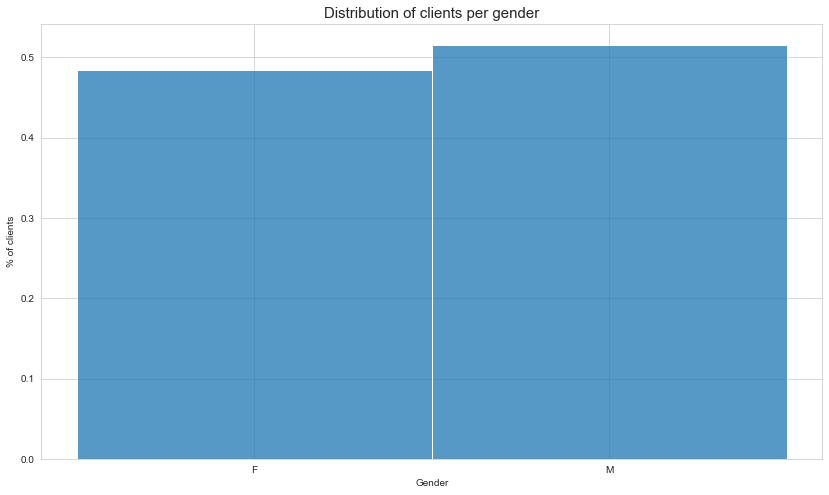

In [90]:
# Plot the percentage of male and female customers

plt.figure(figsize=(14,8))
sns.histplot(data = df_to_96, x = "gender", stat = "probability", discrete = True)

plt.title('Distribution of clients per gender', fontsize=15,ha='center')
plt.xlabel('Gender')
plt.ylabel('% of clients')

plt.show()
# There is approximatevely as much male clients than female clients

### Proportion of clients per region

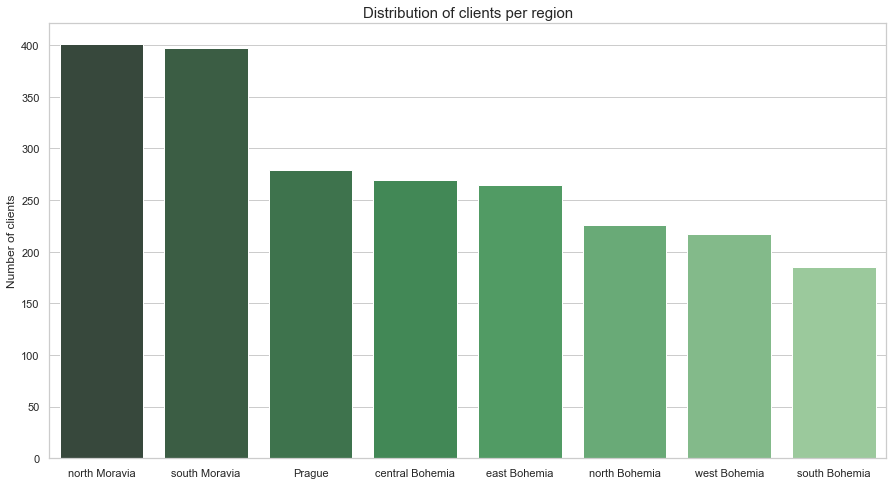

In [91]:
#Creation of data frame with the number of clients per region
clients_per_region = df_to_96.groupby('region')['client_id'].nunique().sort_values(ascending=False).reset_index()

#Configuration of color
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(clients_per_region))

#Barplot
plt.figure(figsize=(15,8))
barplot_region = sns.barplot(data=clients_per_region, 
                             x='region', 
                             y='client_id', 
                             palette=np.array(pal[::-1]))
plt.title('Distribution of clients per region', fontsize=15,ha='center')
plt.xlabel('')
plt.ylabel('Number of clients')

plt.show()

## Which age group spends the most ?

<Figure size 1008x576 with 0 Axes>

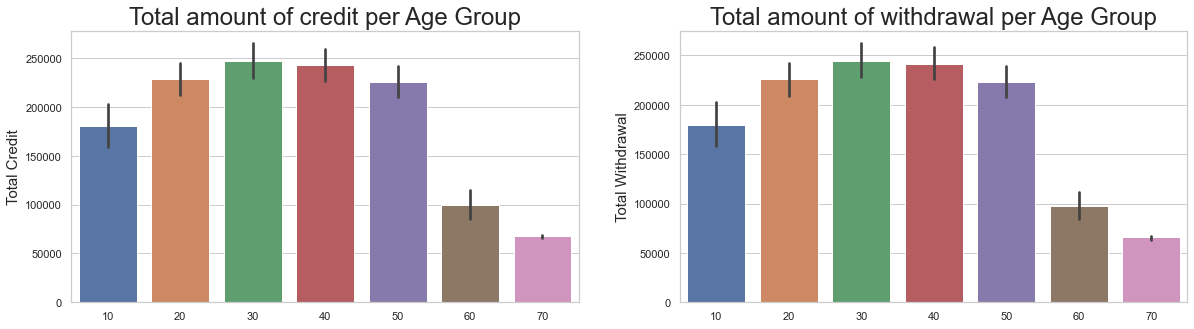

In [92]:
# Plot the total_credit per age_group
plt.figure(figsize=(14,8))
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

sns.barplot(data=df_to_96, x="age_group", y="total_credit", ax=ax[0]).set_title('Total amount of credit per Age Group', size = 24)

sns.barplot(data=df_to_96, x="age_group", y="total_withdrawal", ax=ax[1]).set_title('Total amount of withdrawal per Age Group', size = 24)

# Set label for x-axis
ax[0].set_xlabel(None)
ax[0].set_ylabel( "Total Credit" , size = 15)
  
# Set label for y-axis
ax[1].set_xlabel(None)
ax[1].set_ylabel( "Total Withdrawal" , size = 15)

# Display figure
plt.show()

## Balance difference on the target variable loan granted

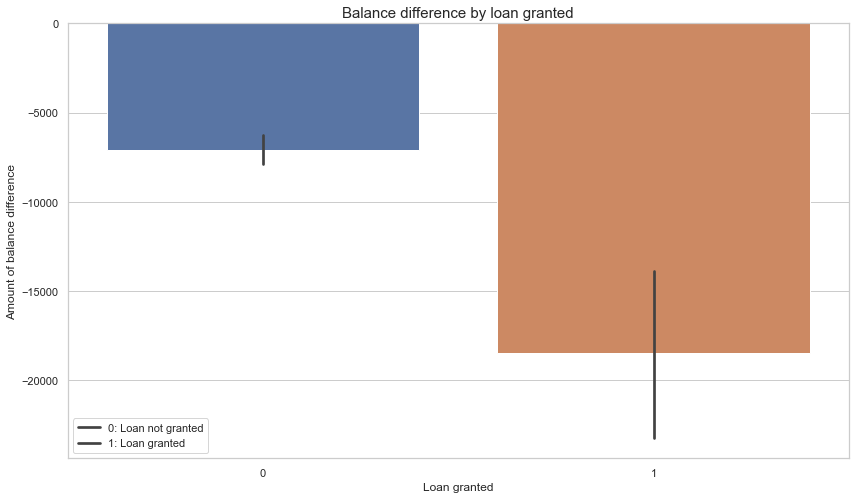

In [93]:
#Bar plot of balance difference on the loan granted target 1

plt.figure(figsize=(14,8))
sns.barplot(data=df_to_96, x="loan_granted", y='balance_difference')

plt.title('Balance difference by loan granted', fontsize=15,ha='center')
plt.xlabel('Loan granted')
plt.ylabel('Amount of balance difference')
plt.legend(labels=['0: Loan not granted', '1: Loan granted'])

## 

## Impact in loan granted with LOR and total withdrawal variables

Text(0, 0.5, 'Amount of withdrawal')

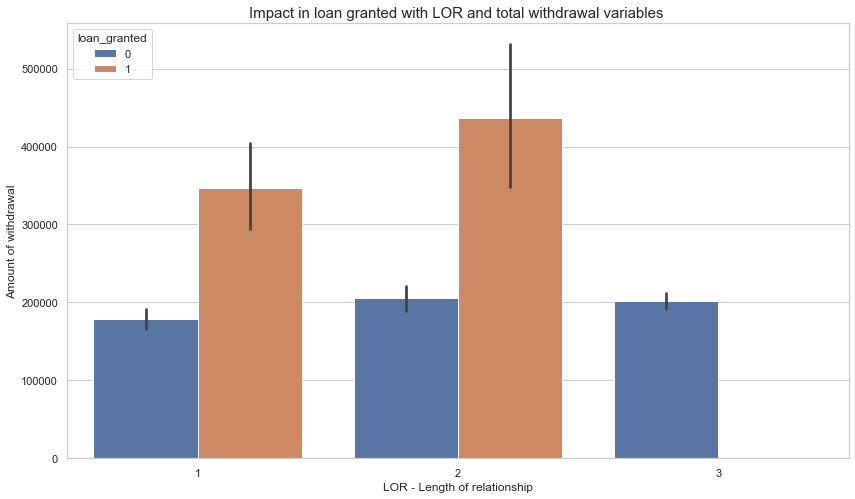

In [94]:
plt.figure(figsize=(14,8))

sns.barplot(data=df_to_96, x="lor", y='total_withdrawal', hue = 'loan_granted')

plt.title('Impact in loan granted with LOR and total withdrawal variables ', fontsize=15,ha='center')
plt.xlabel('LOR - Length of relationship')
plt.ylabel('Amount of withdrawal')

## Impact in loan granted with LOR and total credit variables

Text(0, 0.5, 'Amount of credit')

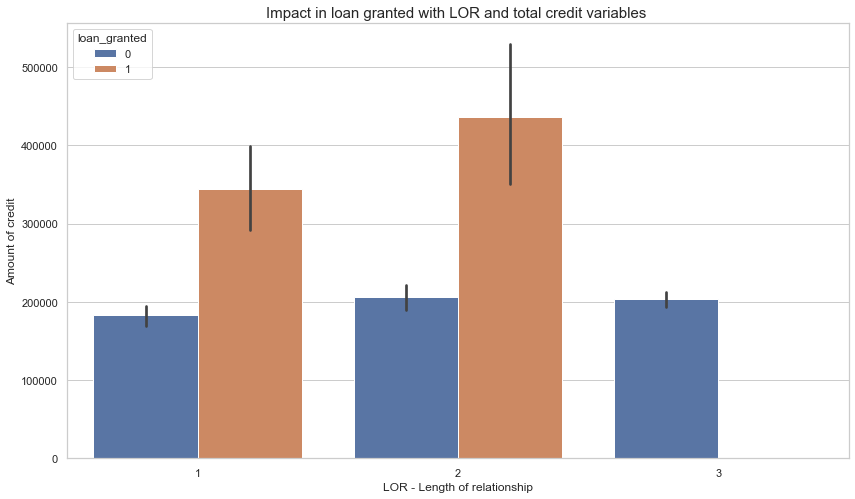

In [95]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_to_96, x="lor", y='total_credit', hue = 'loan_granted')
plt.title('Impact in loan granted with LOR and total credit variables ', fontsize=15,ha='center')
plt.xlabel('LOR - Length of relationship')
plt.ylabel('Amount of credit')

## Total amount of withdrawal per month

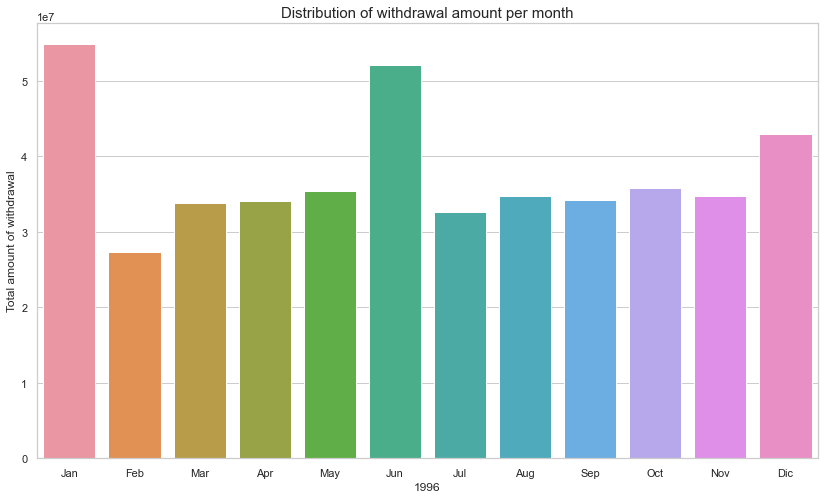

In [96]:
# Make a data frame for the total withdrawal transactions amount of the months
withdrawal_month=pd.DataFrame(df_to_96[['withdrawal_jan96',
                                        'withdrawal_feb96',
                                        'withdrawal_mar96',
                                        'withdrawal_apr96',
                                        'withdrawal_may96',
                                        'withdrawal_jun96',
                                        'withdrawal_jul96',
                                        'withdrawal_aug96',
                                        'withdrawal_sep96',
                                        'withdrawal_oct96',
                                        'withdrawal_nov96',
                                        'withdrawal_dec96']].sum(axis=0))
withdrawal_month_gr=pd.DataFrame(withdrawal_month[0]).reset_index()
withdrawal_month_gr = withdrawal_month_gr.rename(columns={'index':'1996',0:'Total_amount_withdrawal'})
withdrawal_month_gr



# Make a graphic of the total withdrawal amount per month
plt.figure(figsize=(14,8))
withdrawal_month = sns.barplot(data=withdrawal_month_gr, x="1996", y="Total_amount_withdrawal")
withdrawal_month.set(xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"])

plt.title('Distribution of withdrawal amount per month', fontsize=15,ha='center')
plt.xlabel('1996')
plt.ylabel('Total amount of withdrawal')

plt.show()

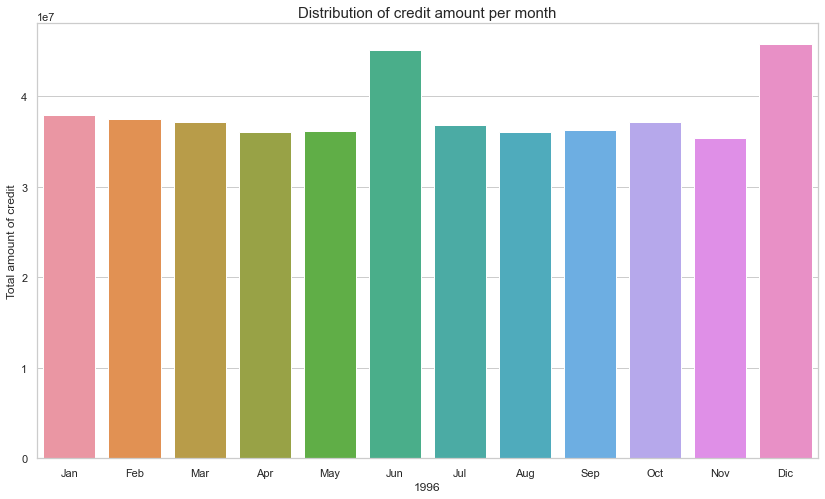

In [97]:
# Make a data frame for the total withdrawal transactions amount of the months
credit_month=pd.DataFrame(df_to_96[['credit_jan96',
                                        'credit_feb96',
                                        'credit_mar96',
                                        'credit_apr96',
                                        'credit_may96',
                                        'credit_jun96',
                                        'credit_jul96',
                                        'credit_aug96',
                                        'credit_sep96',
                                        'credit_oct96',
                                        'credit_nov96',
                                   'credit_dec96']].sum(axis=0))
credit_month_gr=pd.DataFrame(credit_month[0]).reset_index()
credit_month_gr = credit_month_gr.rename(columns={'index':'1996',0:'Total_amount_credit'})
credit_month_gr



# Make a graphic of the total withdrawal amount per month
plt.figure(figsize=(14,8))
credit_month = sns.barplot(data=credit_month_gr, x="1996", y="Total_amount_credit")
credit_month.set(xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"])

plt.title('Distribution of credit amount per month', fontsize=15,ha='center')
plt.xlabel('1996')
plt.ylabel('Total amount of credit')


plt.show()

## Number of transactions per month

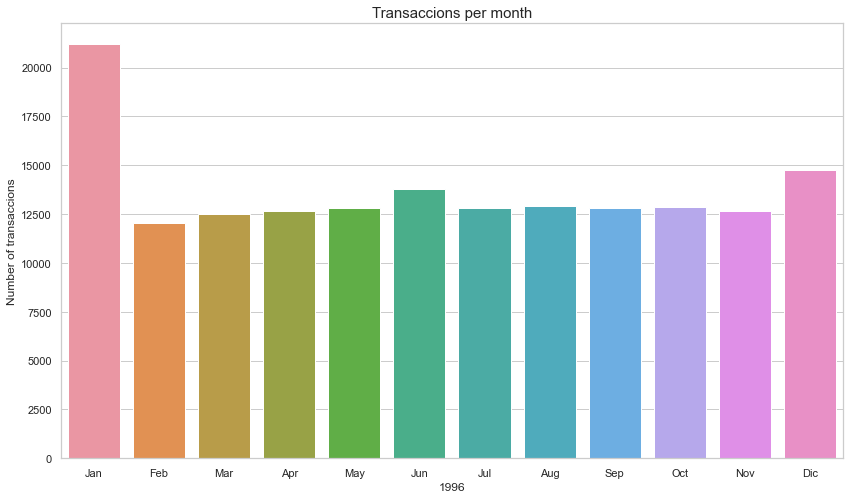

In [98]:
# Make a data frame for the total number of transactions of the months
transactions_month=pd.DataFrame(df_to_96[['num_trans_jan96',
                                        'num_trans_feb96',
                                        'num_trans_mar96',
                                        'num_trans_apr96',
                                        'num_trans_may96',
                                        'num_trans_jun96',
                                        'num_trans_jul96',
                                        'num_trans_aug96',
                                        'num_trans_sep96',
                                        'num_trans_oct96',
                                        'num_trans_nov96',
                                        'num_trans_dec96']].sum(axis=0))
transactions_month_gr=pd.DataFrame(transactions_month[0]).reset_index()
transactions_month_gr = transactions_month_gr.rename(columns={'index':'1996',0:'Total_transactions_month'})
transactions_month_gr



# Make a graphic of the total number of transactions per month
plt.figure(figsize=(14,8))
trans_month = sns.barplot(data=transactions_month_gr, x="1996", y="Total_transactions_month")
trans_month.set(xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"])


plt.title('Transaccions per month', fontsize=15,ha='center')
plt.xlabel('1996')
plt.ylabel('Number of transaccions')

plt.show()

## Number of transactions based on the LOR and the effect on the dependent variable loan granted

Text(34.92469236111111, 0.5, 'Number of transaccions')

<Figure size 1008x576 with 0 Axes>

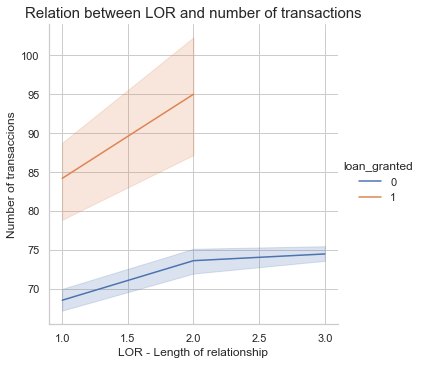

In [99]:
# Make a graphic that represents the relation of the variables of total number of transactions and LOR
# in order to see the effect on whether the loan will be granted or not
plt.figure(figsize=(14,8))
sns.relplot(
    data=df_to_96, kind="line",
    x="lor", y="total_nbr_of_transactions", hue="loan_granted",
)

plt.title('Relation between LOR and number of transactions', fontsize=15,ha='center')
plt.xlabel('LOR - Length of relationship')
plt.ylabel('Number of transaccions')

## Segment distribution by RFM

Text(0, 0.5, 'Number of clients')

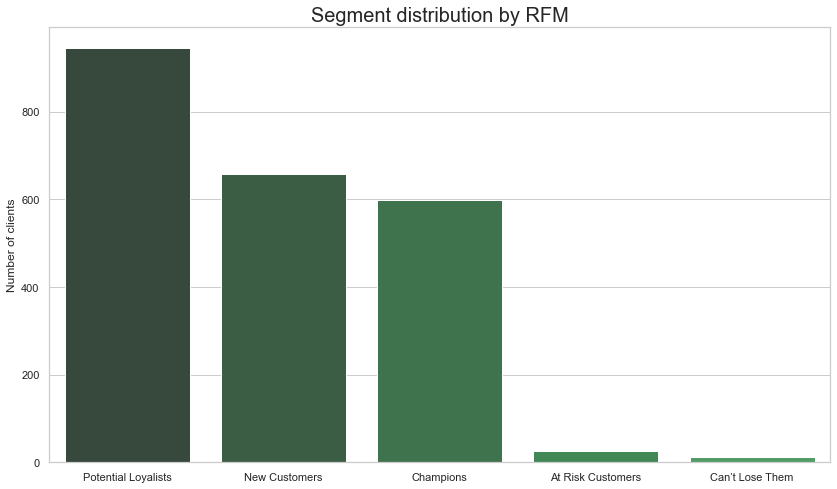

In [100]:
#Creation of data frame to plot a barchart the number of clients per segment
customer_segment = df_to_96.groupby('customer_segmentation')['client_id'].nunique().sort_values(ascending=False).reset_index()

#Configuration of color
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(clients_per_region))

#Barplot
plt.figure(figsize=(14,8))
sns.barplot(data=customer_segment, 
                             x='customer_segmentation', 
                             y='client_id', 
                             palette=np.array(pal[::-1]))

plt.title('Segment distribution by RFM',fontsize=20,ha='center')
plt.xlabel('')
plt.ylabel('Number of clients')

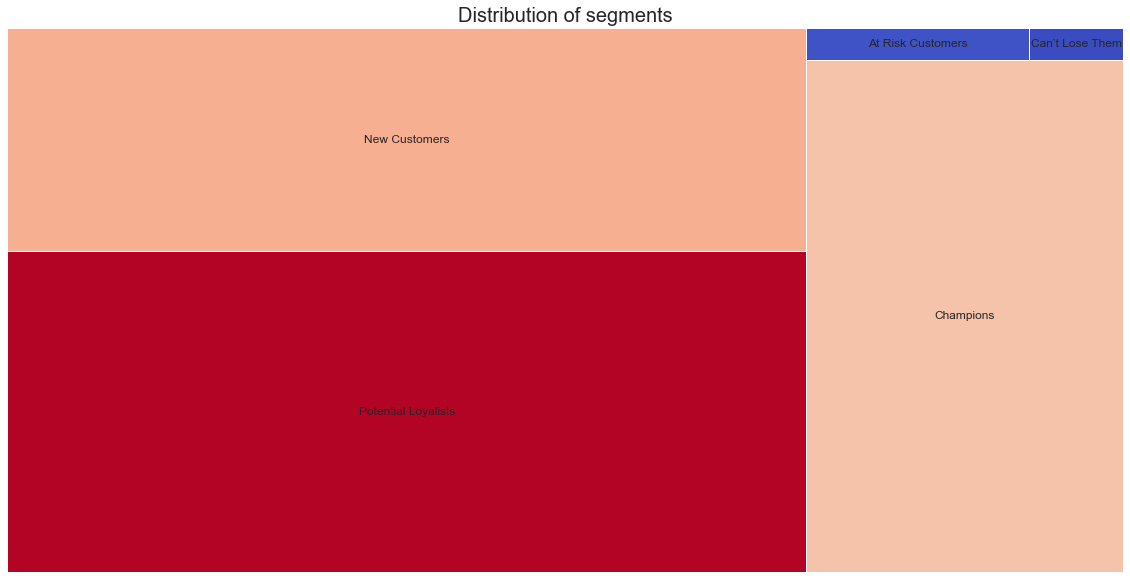

In [101]:
#Creation of other graphic related to the distribution of segments 
cmap = matplotlib.cm.coolwarm
mini = min(customer_segment['client_id'])
maxi = max(customer_segment['client_id'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

colors = [cmap(norm(value)) for value in customer_segment['client_id']]

fig = plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(20,10)
squarify.plot(sizes=customer_segment['client_id'],
             label = customer_segment.customer_segmentation, alpha=1, color=colors)

plt.title('Distribution of segments', fontsize=20,ha='center')
plt.axis('off')
plt.show()

## Loan granted by RFM distribution - Target1

C:\Users\bariastoribio\AppData\Local\Temp\ipykernel_29032\928558215.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0, 0.5, 'Number of loan granted')

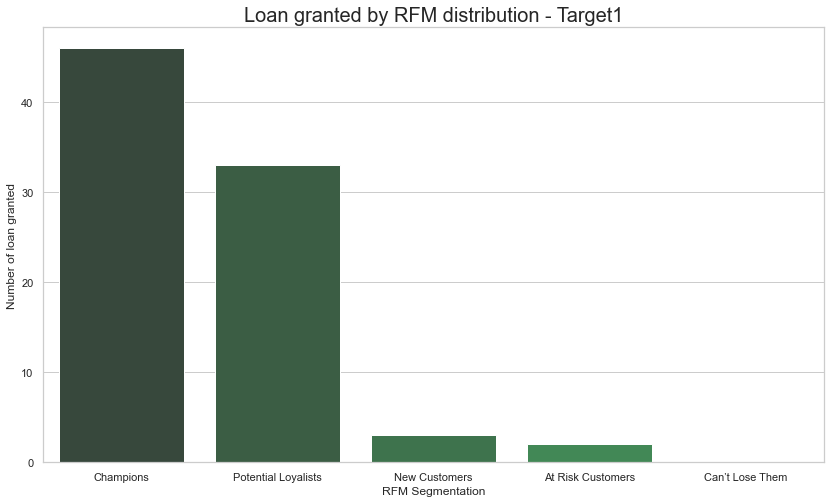

In [102]:
#Creation of barchart to know the distribution of client segments that got loan granted(Target 1) in 1997 
target1_customer_segment = df_to_96.groupby('customer_segmentation')['client_id','loan_granted'].sum().sort_values('loan_granted',ascending=False).reset_index()
target1_customer_segment.head()

#Configuration of color
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(clients_per_region))

#Barplot
plt.figure(figsize=(14,8))
sns.barplot(data=target1_customer_segment, 
                             x='customer_segmentation', 
                             y='loan_granted', 
                             palette=np.array(pal[::-1]))

plt.title('Loan granted by RFM distribution - Target1', fontsize=20,ha='center')
plt.xlabel('RFM Segmentation')
plt.ylabel('Number of loan granted')

## Card issued by RFM distribution - Target2

C:\Users\bariastoribio\AppData\Local\Temp\ipykernel_29032\2413036871.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0, 0.5, 'Number of card issued')

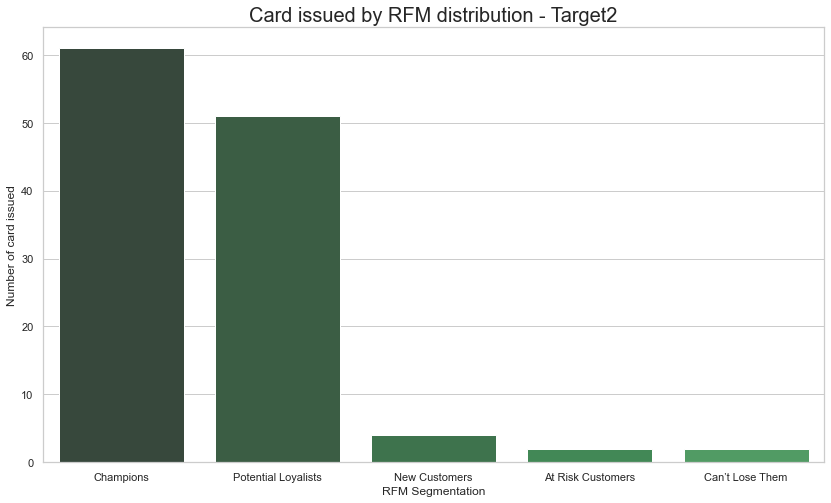

In [103]:
#Creation of barchart to know the distribution of client segments (evaluated for their RFM) that got credit card issued in 1997 
target2_customer_segment = df_to_96.groupby('customer_segmentation')['client_id','card_issued'].sum().sort_values('card_issued',ascending=False).reset_index()

#Configuration of color
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(clients_per_region))

#Barplot
plt.figure(figsize=(14,8))
sns.barplot(data=target2_customer_segment, 
                             x='customer_segmentation', 
                             y='card_issued', 
                             palette=np.array(pal[::-1]))

plt.title('Card issued by RFM distribution - Target2', fontsize=20,ha='center')
plt.xlabel('RFM Segmentation')
plt.ylabel('Number of card issued')

## Correlation matrix with independent and dependent variables

Text(0.5, 1.0, 'Matrix correlation of variables')

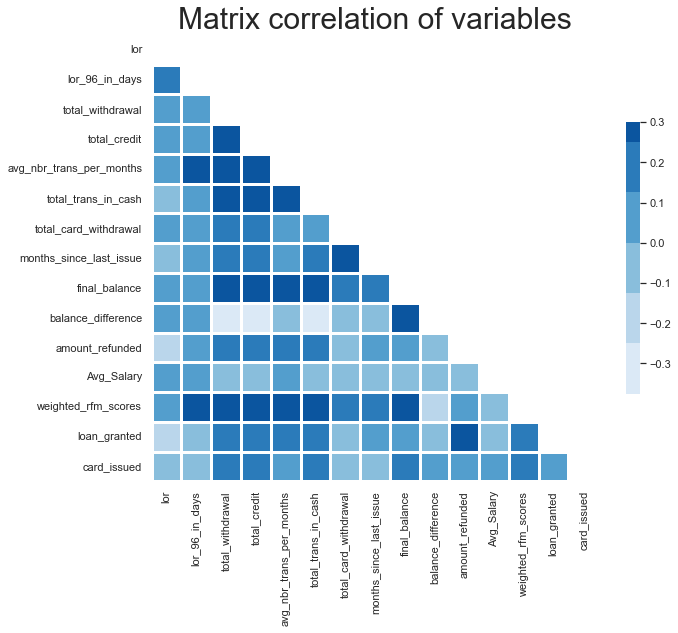

In [104]:
# Correlation matrix for some features
sns.set_theme(style="white")
corr = df_to_96[['lor', 'lor_96_in_days', 'total_withdrawal', 'total_credit', 'avg_nbr_trans_per_months', 
                 'total_trans_in_cash', 'total_card_withdrawal', 'months_since_last_issue', 'final_balance', 
                 'balance_difference','amount_refunded','Avg_Salary', 'weighted_rfm_scores','loan_granted','card_issued']].corr()
mask = np.triu(df_to_96[['lor', 'lor_96_in_days', 'total_withdrawal', 'total_credit', 'avg_nbr_trans_per_months', 
                 'total_trans_in_cash', 'total_card_withdrawal', 'months_since_last_issue', 'final_balance', 
                 'balance_difference','amount_refunded','Avg_Salary', 'weighted_rfm_scores','loan_granted','card_issued']].corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

plt.title('Matrix correlation of variables', fontsize=30,ha='center')

# F. Basetable for modeling

In [105]:
# Prepare the basetable for machine learning by creating dummies

df_to_96_modeling=df_to_96.copy(deep=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['gender'], drop_first=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['age_group'], drop_first=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['frequency'], drop_first=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['card_type'], drop_first=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['district_name'], drop_first=True)
df_to_96_modeling=pd.get_dummies(df_to_96_modeling,columns=['region'], drop_first=True)

In [106]:
# Check the dataframe info (it has 185 variables)

df_to_96_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Columns: 185 entries, client_id to region_west Bohemia
dtypes: datetime64[ns](2), float64(59), int32(12), int64(16), object(1), uint8(95)
memory usage: 1.7+ MB


In [107]:
df_to_96_modeling.head()

,client_id,bank_district_id,account_id,client_district_id,lor,disp_id,nbr_users,birth_year,age,total_credit,...,district_name_Zdar nad Sazavou,district_name_Zlin,district_name_Znojmo,region_central Bohemia,region_east Bohemia,region_north Bohemia,region_north Moravia,region_south Bohemia,region_south Moravia,region_west Bohemia
0,692,74,576,55,3,692,2,1936,60,76097.3,...,0,0,0,0,0,0,0,0,1,0
1,4601,1,3818,74,3,4601,2,1935,61,234806.4,...,0,0,0,0,0,0,1,0,0,0
2,844,22,704,55,3,844,2,1945,51,228514.9,...,0,0,0,0,0,0,0,0,1,0
3,2873,16,2378,16,3,2873,1,1975,21,664545.4,...,0,0,0,0,0,0,0,1,0,0
4,3177,24,2632,24,3,3177,1,1938,58,186658.9,...,0,0,0,0,0,0,0,0,0,1
